In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import*
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import *
from IPython.display import Image, display_svg
import re
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from os import path
import ipywidgets as widgets
import pandas_profiling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.vq import kmeans, vq , whiten
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import scipy as sp
import ipywidgets as widgets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from copy import deepcopy
from sklearn import tree
import collections
import h2o
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from scipy import stats
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
from xgboost import plot_importance
# h2o.init()

In [7]:
df = pd.read_csv('C:\\Users\\abhin\\Desktop\\M571\\bankruptcy_Train.csv')
test = pd.read_csv('C:\\Users\\abhin\\Desktop\\M571\\bankruptcy_Test_X.csv')

## Drop Duplicates

In [8]:
df.drop_duplicates(keep = "first", inplace = True)

# Up sample the data

In [ ]:
features = ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64']
x1, y1 = df.iloc[:,:-1],df.iloc[:,-1]
x_resampled, y_resampled = SMOTE().fit_resample(x1, y1)
x_resampled = pd.DataFrame(x_resampled)
x_resampled.columns = features
y_resampled = pd.DataFrame(y_resampled)
y_resampled.columns = ["class"]
# df = x_resampled.join(y_resampled)
df = pd.concat([x_resampled,y_resampled], axis = 1)

In [ ]:
x_resampled.shape, y_resampled.shape, df.shape

In [ ]:
df.isna().sum().sum()

# remove outliers

In [ ]:
x1 = df.drop('class', axis=1); y1=df['class']
z = np.abs(stats.zscore(x1))
x1 = x1[(z < 4).all(axis=1)]

In [ ]:
df = x1.join(y1)

In [ ]:
df.isna().sum().sum()

# interaction terms

In [ ]:
x1 = df.drop('class', axis=1); y1=df['class']
poly = PolynomialFeatures(interaction_only=True)
x1 = pd.DataFrame(poly.fit_transform(x1))
x1.columns = ["Attr"+str(col) for col in x1.columns]
x1.shape,y1.shape

In [ ]:
chi_df = x1.join(y1)
chi_df = chi_df.round(3)

In [ ]:
chi_df.isna().sum().sum()

In [ ]:
chi_df.dropna(axis=0,inplace=True)

# drop correlated features

In [ ]:
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(chi_df.select_dtypes(include=num_colums).columns)
chi_df = chi_df[numerical_columns]
chi_df.shape

In [ ]:
correlated_features = set()
correlation_matrix = chi_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

chi_df.drop(labels=correlated_features, axis=1, inplace=True)
chi_df.shape

In [ ]:
chi_df.isna().sum().sum()

# plot PCA explained variance

In [ ]:
from sklearn.decomposition import PCA
x = chi_df.drop('class',axis=1)
y = chi_df['class']
scaler = MinMaxScaler(feature_range=[0, 1])
rescaled = scaler.fit_transform(x)
pca = PCA().fit(rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()
x = pd.DataFrame(x)

# PCA

In [ ]:
pca = PCA(n_components=80)
principalComponents = pca.fit_transform(rescaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                          'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19',
                          'pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28',
                          'pca29','pca30','pca31','pca32','pca33','pca34','pca35','pca36','pca37','pca38',
                          'pca39','pca40','pca41','pca42','pca43','pca44','pca45','pca46','pca47','pca48',
                          'pca49','pca50','pca51','pca52','pca53','pca54','pca55','pca56','pca57','pca58',
                          'pca59','pca60','pca61','pca62','pca63','pca64','pca65','pca66','pca67','pca68',
                          'pca69','pca70','pca71','pca72','pca73','pca74','pca75','pca76','pca77','pca78',
                          'pca79','pca80'])
finalDf = principalDf.join(y)

In [ ]:
finalDf.dropna(axis=0,inplace=True)
finalDf.isna().sum().sum()

In [ ]:
finalDf.columns

# Pandas Profiling

In [ ]:
pandas_profiling.ProfileReport(finalDf)

# XG Baseline

In [ ]:
x = finalDf.drop('class',axis=1); y = finalDf['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc"]
xg_reg = XGBClassifier()
xg_reg.fit(x_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

# XG Hyperparameter Tuning

In [ ]:
params = {
    'n_estimators': np.arange(200,600,50),
    "learning_rate": np.arange(0,2,0.2),
#     "alpha": np.arange(0,5,0.5),
#     "lambda": np.arange(0,5,0.5),
#     "gamma": np.arange(0,5,0.5),
    "max_depth": np.arange(1,17,1),
#     "max_delta_step": np.arange(0,5,0.5)
}
folds = 6
param_comb = 10
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )
random_search.fit(x_train, y_train)

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

# Final XG

In [75]:
xg_reg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xg_reg.fit(x_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.78711	validation_1-auc:0.763915
[1]	validation_0-auc:0.817905	validation_1-auc:0.78754
[2]	validation_0-auc:0.824286	validation_1-auc:0.791336
[3]	validation_0-auc:0.83831	validation_1-auc:0.801185
[4]	validation_0-auc:0.847321	validation_1-auc:0.809222
[5]	validation_0-auc:0.856311	validation_1-auc:0.816883
[6]	validation_0-auc:0.861816	validation_1-auc:0.823182
[7]	validation_0-auc:0.870148	validation_1-auc:0.831154
[8]	validation_0-auc:0.876063	validation_1-auc:0.833344
[9]	validation_0-auc:0.879678	validation_1-auc:0.835188
[10]	validation_0-auc:0.882604	validation_1-auc:0.838613
[11]	validation_0-auc:0.888856	validation_1-auc:0.842205
[12]	validation_0-auc:0.893409	validation_1-auc:0.847504
[13]	validation_0-auc:0.895479	validation_1-auc:0.850492
[14]	validation_0-auc:0.899437	validation_1-auc:0.852307
[15]	validation_0-auc:0.901922	validation_1-auc:0.85337
[16]	validation_0-auc:0.904962	validation_1-auc:0.8538
[17]	validation_0-auc:0.908638	validation_1-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

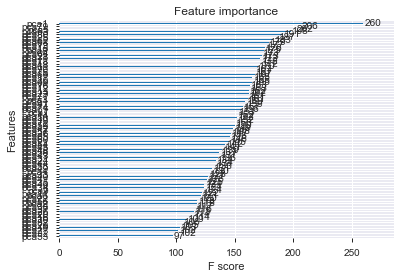

In [79]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# plot feature importance
plot_importance(xg_reg)
# plt.show()
plt.savefig("C:\\Users\\abhin\\Desktop\\M571\\fig.pdf")

# Predictions

In [ ]:
pred = xg_reg.predict(x_test)
roc_auc_score(y_test, pred)

In [ ]:
test = test.drop("ID", axis=1)
pred_final = xg_reg.predict_proba(test)
pred_final = pd.DataFrame(pred_final)
pred_final.head()

# pred_final = pd.concat([test["ID"], pred_final[0]], axis = 1)
# pred_final.head()
# pd.DataFrame(pred_final).to_csv('C:\\Users\\abhin\\Desktop\\M571\\d4bscore.csv')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy
 
# # load X and y
# x, y = chi_df.drop('class',axis=1),chi_df['class']
# # define random forest classifier, with utilising all cores and
# # sampling in proportion to y labels
# forest = RandomForestClassifier(n_jobs=4, class_weight='auto')
 
# # define Boruta feature selection method
# feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# # find all relevant features
# feat_selector.fit(x, y)

In [ ]:
# # check selected features
# feat_selector.support_
 
# # check ranking of features
# feat_selector.ranking_
 
# # call transform() on X to filter it down to selected features
# X_filtered = feat_selector.transform(X)

In [ ]:
# num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerical_columns = list(df.select_dtypes(include=num_colums).columns)
# df = df[numerical_columns]
# df.shape

In [ ]:
# train_features, test_features, train_labels, test_labels = train_test_split(
#     df.drop(labels=['class'], axis=1),
#     df['class'],
#     test_size=0.2,
#     random_state=41)

# correlated_features = set()
# correlation_matrix = df.corr()
# for i in range(len(correlation_matrix .columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)


# train_features.drop(labels=correlated_features, axis=1, inplace=True)
# test_features.drop(labels=correlated_features, axis=1, inplace=True)

# train_features.shape, test_features.shape

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from mlxtend.feature_selection import SequentialFeatureSelector

# feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
#            k_features=30,
#            forward=True,
#            verbose=2,
#            scoring='roc_auc',
#            cv=4)

# features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

In [ ]:
# filtered_features = train_features.columns[list(features.k_feature_idx_)]
# filtered_features

In [ ]:
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# x, y = df.iloc[:,:-1],df.iloc[:,-1]
# # create a base classifier used to evaluate a subset of attributes
# logit = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(logit, 30)
# rfe = rfe.fit(x, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)